<a href="https://colab.research.google.com/github/SamuelGCardoso/Training_codes/blob/main/Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title: Solar Power Generation & Efficiency Analysis

Working with real data and finding issues

/tmp/ipython-input-2723894909.py:24: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_solar['DATE_TIME'] = pd.to_datetime(df_solar['DATE_TIME'])



 'Solar Data Loaded Successfully!' 

   DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD  \
0 2020-05-15   4135001  1BY6WEcLGh8j5v7       0.0       0.0          0.0   
1 2020-05-15   4135001  1IF53ai7Xc0U56Y       0.0       0.0          0.0   
2 2020-05-15   4135001  3PZuoBAID5Wc2HD       0.0       0.0          0.0   
3 2020-05-15   4135001  7JYdWkrLSPkdwr4       0.0       0.0          0.0   
4 2020-05-15   4135001  McdE0feGgRqW7Ca       0.0       0.0          0.0   

   TOTAL_YIELD  
0    6259559.0  
1    6183645.0  
2    6987759.0  
3    7602960.0  
4    7158964.0  


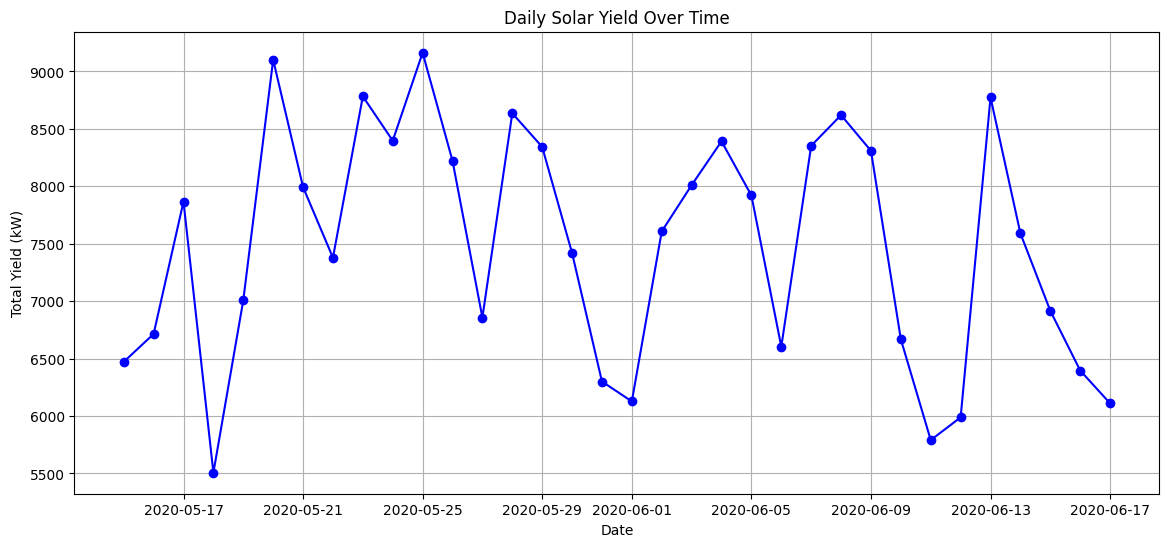

--- TOP 5 LOWEST PRODUCTION DAYS ---
DATE_TIME
2020-05-18    5506.0
2020-06-11    5790.0
2020-06-12    5988.0
2020-06-17    6110.0
2020-06-01    6127.0
Name: DAILY_YIELD, dtype: float64

 --- SHUTDOWNS --- 
 DATE_TIME
2020-05-15    0.0
2020-05-16    0.0
2020-05-17    0.0
2020-05-18    0.0
2020-05-19    0.0
2020-05-20    0.0
2020-05-21    0.0
2020-05-22    0.0
2020-05-23    0.0
2020-05-24    0.0
2020-05-25    0.0
2020-05-26    0.0
2020-05-27    0.0
2020-05-28    0.0
2020-05-29    0.0
2020-05-30    0.0
2020-05-31    0.0
2020-06-01    0.0
2020-06-02    0.0
2020-06-03    0.0
2020-06-04    0.0
2020-06-05    0.0
2020-06-06    0.0
2020-06-07    0.0
2020-06-08    0.0
2020-06-09    0.0
2020-06-10    0.0
2020-06-11    0.0
2020-06-12    0.0
2020-06-13    0.0
2020-06-14    0.0
2020-06-15    0.0
2020-06-16    0.0
2020-06-17    0.0
Name: DAILY_YIELD, dtype: float64

--- Data for the Worst Day (2020-05-18) ---
                DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
6000 2020-05-18

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

'''!git init # Initialize a local git folder

# 2. Configure your identity
!git config --global user.email "samuel.g.cardoso@uel.br"
!git config --global user.name "SamuelGCardoso"

# 3. Add your files
!git add .

# 4. Commit and Push
!git commit -m " implementing more calculations e making look more clean"
!git remote add origin https://github.com/SamuelGCardoso/Training_codes.git
!git push -u origin main
'''

url = "https://raw.githubusercontent.com/kaivalpanchal/Solar-Panel-Power-Generation/refs/heads/main/Plant_1_Generation_Data.csv"
df_solar = pd.read_csv(url)

# Convert the 'DATE_TIME' column to actual Python dates
df_solar['DATE_TIME'] = pd.to_datetime(df_solar['DATE_TIME'])

# Show the first few rows

print('\n',f"\033[1m'Solar Data Loaded Successfully!'\033[0m",'\n')  #trying to make the code more friendly :-)

print(df_solar.head())

# Creating a summary of the total yield per day
daily_yield = df_solar.groupby(df_solar['DATE_TIME'].dt.date)['DAILY_YIELD'].max()

# Visualize the production over time
plt.figure(figsize=(14, 6))   # figsize(x,y)
daily_yield.plot(kind='line', marker='o', color='blue')
plt.title('Daily Solar Yield Over Time')
plt.xlabel('Date')
plt.ylabel('Total Yield (kW)')
plt.grid(True)
plt.show()
#  Find the 5 days with the lowest total yield
# We exclude days with 0 yield (as they might be system-wide shutdowns)
low_yield_days = daily_yield[daily_yield > 0].sort_values().head(5)
# Showing the days with the lowest yield
print("--- TOP 5 LOWEST PRODUCTION DAYS ---")
print(low_yield_days)

# To find shutdown days, first filter for DAILY_YIELD == 0, then get 'DATE_TIME' for those days.

df_no_yield = df_solar[df_solar['DAILY_YIELD'] == 0]
shutdowns = df_no_yield.groupby(df_no_yield['DATE_TIME'].dt.date)['DAILY_YIELD'].max()

if not shutdowns.empty:
    print('\n',f"\033[1m--- SHUTDOWNS ---\033[0m",'\n',shutdowns)

else:
  print('\n',f"\033[1m--- NO SHUTDOWNS ---\033[0m",'\n',shutdowns)

# 2. Let's look at one specific bad day (e.g., the first one in your list)
# We will filter the main table for that specific date
worst_day_date = low_yield_days.index[0]
worst_day_data = df_solar[df_solar['DATE_TIME'].dt.date == worst_day_date]
print(f"\n\033[1m--- Data for the Worst Day ({worst_day_date}) ---\033[0m\n",worst_day_data)


# 3. See which Inverter (SOURCE_KEY) produced the least on that day
inverter_comparison = worst_day_data.groupby('SOURCE_KEY')['DAILY_YIELD'].max().sort_values()

print(f"\n--- Inverter Performance on {worst_day_date} ---",inverter_comparison.head())



/tmp/ipython-input-585454010.py:10: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_solar['DATE_TIME'] = pd.to_datetime(df_solar['DATE_TIME'])


The worst production day was: 2020-05-18


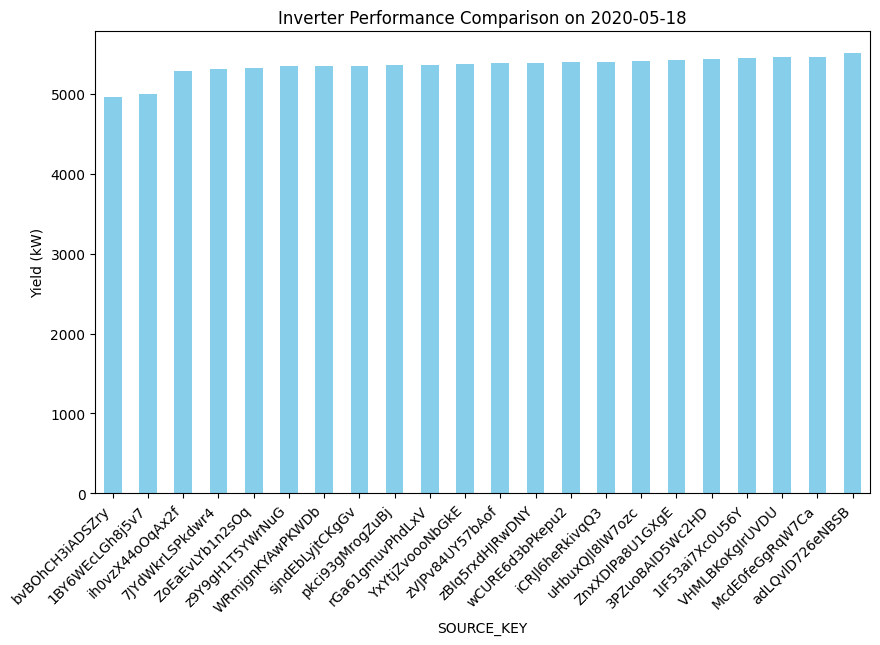


 Difference between best and worst inverter: 544.00 kW'
 Difference between best and worst inverter: 544.00 kW 
 Difference between best and worst inverter: 544.00 kW
 Difference between best and worst inverter: 544.00 kW 


In [ ]:
# Investigating the possibles reason to the failure
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url = "https://raw.githubusercontent.com/kaivalpanchal/Solar-Panel-Power-Generation/refs/heads/main/Plant_1_Generation_Data.csv"
df_solar = pd.read_csv(url)

# Convert the 'DATE_TIME' column to actual Python dates
df_solar['DATE_TIME'] = pd.to_datetime(df_solar['DATE_TIME'])

# Creating a summary of the total yield per day

daily_yield = df_solar.groupby(df_solar['DATE_TIME'].dt.date)['DAILY_YIELD'].max()

# 1. Identify the 'Worst Day' (lowest yield above 0)

worst_day = daily_yield[daily_yield > 0].idxmin()
# .idxmin() By default, it returns the index for the minimum value in each column.

print(f"The worst production day was: {worst_day}")

# 2. Compare all inverters on that specific day
worst_day_data = df_solar[df_solar['DATE_TIME'].dt.date == worst_day]
inverter_totals = worst_day_data.groupby('SOURCE_KEY')['DAILY_YIELD'].max().sort_values()

# 3. Ploting the comparison
plt.figure(figsize=(10, 6))
inverter_totals.plot(kind='bar', color='skyblue')
plt.title(f'Inverter Performance Comparison on {worst_day}')
plt.ylabel('Yield (kW)')
plt.xticks(rotation=45, ha='right') #macking the subtitle fit
plt.show()

# 4. Calculation for Insight
yield_variation = inverter_totals.max() - inverter_totals.min()
#print(f"Difference between best and worst inverter: {yield_variation:.2f} kW")
print('\n',f"\033[1m\033[91mDifference between best and worst inverter: {yield_variation:.2f} kW\033[0m'\033[0m",)
#testing collors :-)
print(f"\033[91m Difference between best and worst inverter: {yield_variation:.2f} kW \033[0m")
print(f"\033[1;91m Difference between best and worst inverter: {yield_variation:.2f} kW\033[0m")
print(f"\033[1m Difference between best and worst inverter: {yield_variation:.2f} kW \033[0m")

''' all the bars in the graphic have almost the same hight, thats a sign that is not a especific malfuction, so it maybe be the weather'''

/tmp/ipython-input-1004444620.py:11: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_solar['DATE_TIME'] = pd.to_datetime(df_solar['DATE_TIME'])
/tmp/ipython-input-1004444620.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_solar, x='SOURCE_KEY', y='DAILY_YIELD', palette='viridis')


Your Power BI file 'Solar_Power_BI_Ready.csv' is ready for download!


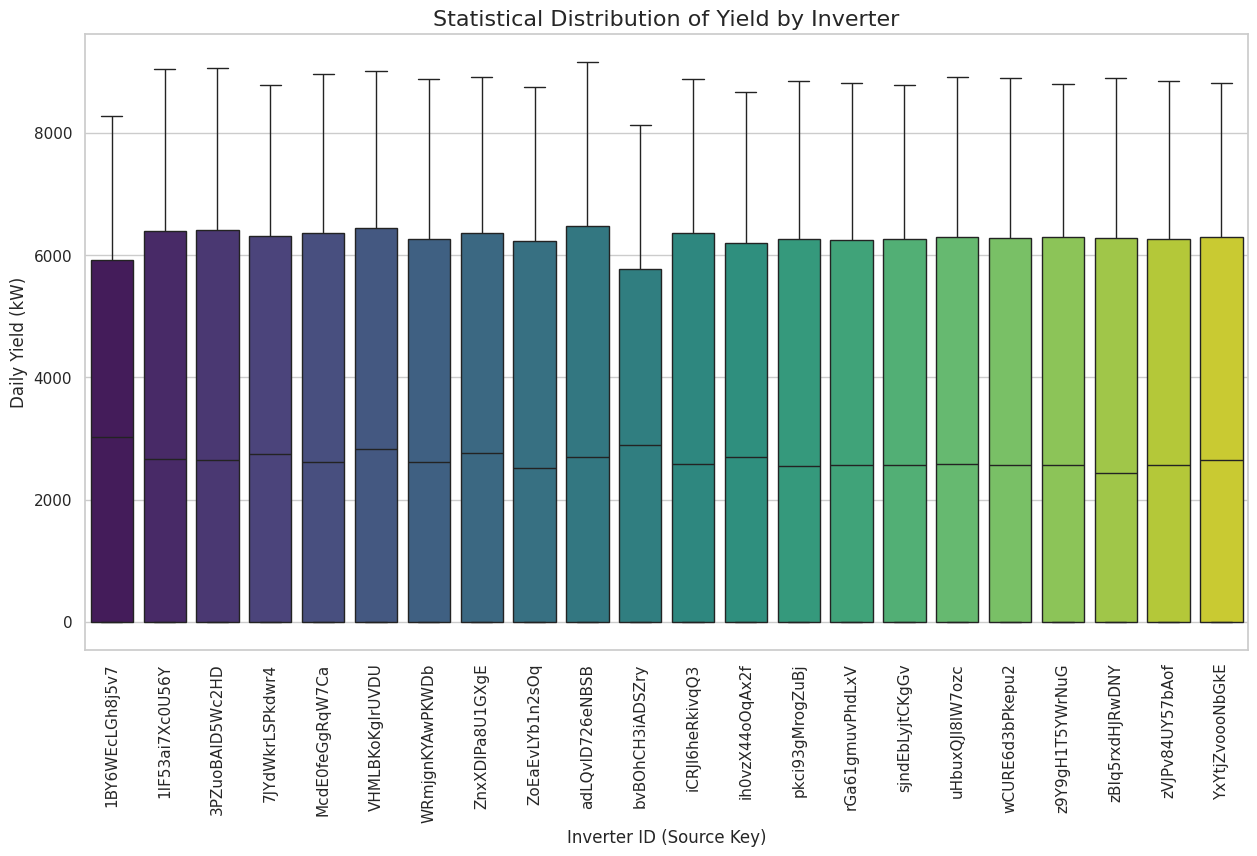

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 1. Create a cleaned summary table for Power BI
# exporting the data profile
url = "https://raw.githubusercontent.com/kaivalpanchal/Solar-Panel-Power-Generation/refs/heads/main/Plant_1_Generation_Data.csv"
df_solar = pd.read_csv(url)
# Turning into a date type for python
df_solar['DATE_TIME'] = pd.to_datetime(df_solar['DATE_TIME'])

# We want Daily Yield and we want to identify the "Month" and "Day" for easy filtering
df_cleaned = df_solar.copy()
df_cleaned['Date'] = df_cleaned['DATE_TIME'].dt.date
df_cleaned['Hour'] = df_cleaned['DATE_TIME'].dt.hour

# 2. Pivot the data to see Inverter performance side-by-side
# This format is much easier for Power BI to turn into a "Comparison Chart"
inverter_summary = df_cleaned.groupby(['Date', 'SOURCE_KEY'])['DAILY_YIELD'].max().unstack()

# 3. Export to a CSV file
inverter_summary.to_csv('Solar_Power_BI_Ready.csv')
print("Your Power BI file 'Solar_Power_BI_Ready.csv' is ready for download!")


# 1. Set a professional style
sns.set_theme(style="whitegrid")

# 2. Create a Boxplot of Daily Yield for each Inverter
# This shows the range, the average (median), and 'outliers' (failures)
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_solar, x='SOURCE_KEY', y='DAILY_YIELD', palette='viridis')

# 3. Clean up the labels
plt.title('Statistical Distribution of Yield by Inverter', fontsize=16)
plt.xlabel('Inverter ID (Source Key)', fontsize=12)
plt.ylabel('Daily Yield (kW)', fontsize=12)
plt.xticks(rotation=90) # Rotate the long sensor IDs so they don't overlap

plt.show()